<a href="https://colab.research.google.com/github/julianaAuzier/API-Twitter-Text-Mining/blob/main/First_tensorflow_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [18]:
# @title Função para construir um modelo ML
def build_model(my_learning_rate):
  # Modelo de Regressão linear
  # A maioria dos modelos tf.keras simples são sequenciais. 
  # Um modelo sequencial contem ums ou mais camadas(layers).
  model = tf.keras.models.Sequential()

  # Descrevendo a topografia do modelo:
  # A topografia de um modelo de regresaão linear simples  
  # é um único nó em uma única camada. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile a topografia do modelo em código que 
  # TensorFlow pode executar eficientemente. Configure 
  # treinametno para minimizar o erro quadrático médio do modelo. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

In [19]:
# @title Função para treinar um modelo ML
def train_model(model, feature, label, epochs, batch_size):
  """Treinando o modelo alimentand-o com dados."""

  # Alimente os valores do recurso e os valores do rotulo para o
  # modelo. O modelo vai treinar para o numero especifico
  # de geracoes, gradualmente aprendendo qual os valores de caracteristicas
  # relacionam-se com os valores do rotulo. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Coletar peso e vies do modelo treinado
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # A lista de geracoes é armazenada separadamente do
  # resto de  history
  epochs = history.epoch
  
  # Coleta a history (instantaneo/snapshot) de cada geracao.
  hist = pd.DataFrame(history.history)

  # Coleta especificamente a raiz do erro
  # quadratico medio do modelo em cada geracao
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Fuções build_model e train_model definidas")

Fuções build_model e train_model definidas


In [20]:
# @title Funções para plotagem
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plote o modelo treinado em relação ao recurso e rótulo de treinamento."""

  plt.xlabel("feature")
  plt.ylabel("label")

  # Plotar os valores do recurso versus os valores do rótulo.
  plt.scatter(feature, label)

  # Criar uma linha vermelha representando o modelo.
  # A linha vermelha começa nas coordenadas (x0, y0)
  # e termina nas coordenadas (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Renderizar o gráfico de dispersão e a linha vermelha.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plotar a curva de perda, que mostra perda versus época."""

  plt.figure()
  plt.xlabel("Geração")
  plt.ylabel("Raiz do erro quadrático médio")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Funções plot_the_model e plot_the_loss_curve definidas.")

Funções plot_the_model e plot_the_loss_curve definidas.


In [21]:
# @title Dados
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 248ms/step - loss: 1085.2578 - root_mean_squared_error: 32.9433
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 1068.1364 - root_mean_squared_error: 32.6824
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 1055.8472 - root_mean_squared_error: 32.4938
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 1045.6353 - root_mean_squared_error: 32.3363
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 1036.6270 - root_mean_squared_error: 32.1967
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 1028.4176 - root_mean_squared_error: 32.0690
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 1020.7817 - root_mean_squared_error: 31.9497
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 1013.5789 - root_mean_squared_error: 31.8368
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 1006.7158 - root_m

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


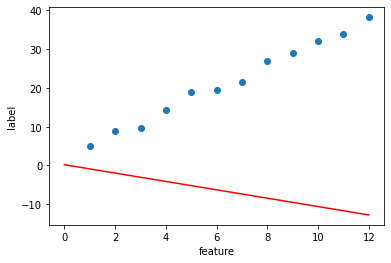

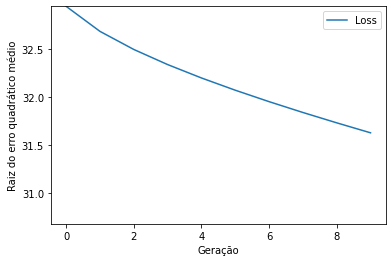

In [22]:
# @title Treinamento do modelo
learning_rate=0.01 # taxa de treinamento
epochs=10          # gerações
my_batch_size=12   # tamanho do lote

my_model = build_model(learning_rate) # construção do modelo
# treinamento:
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
# plot do modelo
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
# plot da curva de perda
plot_the_loss_curve(epochs, rmse)

Epoch 1/450


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 234ms/step - loss: 194.9567 - root_mean_squared_error: 13.9627
Epoch 2/450
1/1 [==============================] - 0s 8ms/step - loss: 187.7513 - root_mean_squared_error: 13.7022
Epoch 3/450
1/1 [==============================] - 0s 9ms/step - loss: 182.6553 - root_mean_squared_error: 13.5150
Epoch 4/450
1/1 [==============================] - 0s 8ms/step - loss: 178.4655 - root_mean_squared_error: 13.3591
Epoch 5/450
1/1 [==============================] - 0s 9ms/step - loss: 174.8024 - root_mean_squared_error: 13.2213
Epoch 6/450
1/1 [==============================] - 0s 9ms/step - loss: 171.4905 - root_mean_squared_error: 13.0954
Epoch 7/450
1/1 [==============================] - 0s 8ms/step - loss: 168.4323 - root_mean_squared_error: 12.9781
Epoch 8/450
1/1 [==============================] - 0s 12ms/step - loss: 165.5671 - root_mean_squared_error: 12.8673
Epoch 9/450
1/1 [==============================] - 0s 8ms/step - loss: 162.8545 - root_me

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


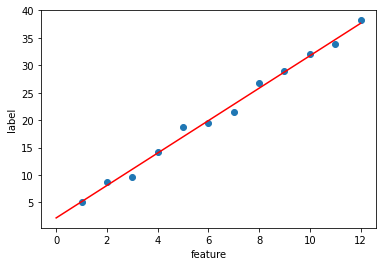

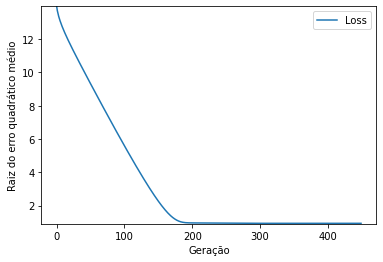

In [23]:
#@title Outra possível solução com mais gerações e maior tamanho de lote
learning_rate=0.01
epochs=450
my_batch_size=12 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# A curva de perda mostra que o modelo converge melhor.

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 248ms/step - loss: 1130.3363 - root_mean_squared_error: 33.6205
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 6642368.0000 - root_mean_squared_error: 2577.2793
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 1116.9612 - root_mean_squared_error: 33.4210
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 6.7226 - root_mean_squared_error: 2.5928
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 1.6553 - root_mean_squared_error: 1.2866
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 1.5350 - root_mean_squared_error: 1.2389
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 1.4900 - root_mean_squared_error: 1.2207
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 1.4482 - root_mean_squared_error: 1.2034
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 1.4072 - root_mean_squar

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


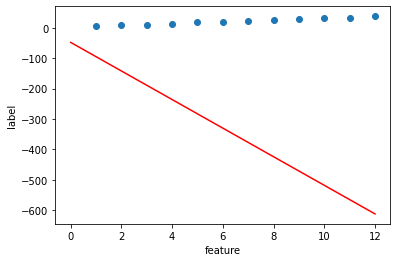

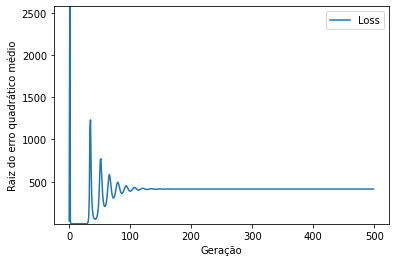

In [24]:
# @title Modificando parâmentros mais uma vez...
# Aumentando a taxa de aprendizado e diminuindo o número de gerações,
# não modificando o tamanhod do lote
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/125


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 0s 1ms/step - loss: 421.3425 - root_mean_squared_error: 20.5266
Epoch 2/125
12/12 [==============================] - 0s 2ms/step - loss: 255.7872 - root_mean_squared_error: 15.9933
Epoch 3/125
12/12 [==============================] - 0s 1ms/step - loss: 152.8276 - root_mean_squared_error: 12.3623
Epoch 4/125
12/12 [==============================] - 0s 1ms/step - loss: 86.0289 - root_mean_squared_error: 9.2752
Epoch 5/125
12/12 [==============================] - 0s 2ms/step - loss: 42.9598 - root_mean_squared_error: 6.5544
Epoch 6/125
12/12 [==============================] - 0s 1ms/step - loss: 17.9849 - root_mean_squared_error: 4.2409
Epoch 7/125
12/12 [==============================] - 0s 1ms/step - loss: 5.4797 - root_mean_squared_error: 2.3409
Epoch 8/125
12/12 [==============================] - 0s 1ms/step - loss: 1.7192 - root_mean_squared_error: 1.3112
Epoch 9/125
12/12 [==============================] - 0s 1ms/step - loss: 1.3022 - root_m

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


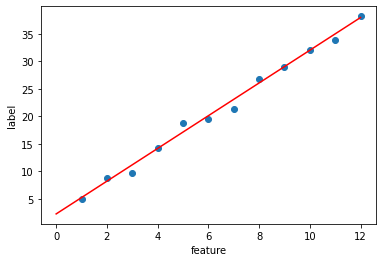

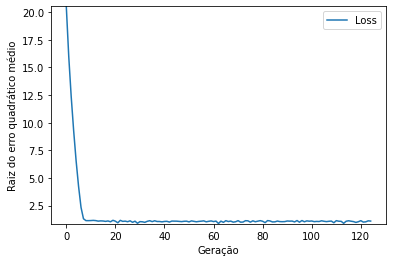

In [25]:
#@title E novamente...

learning_rate=0.05
epochs=125
my_batch_size = 1 # Um tamanho de lote de 1 funciona!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
